In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [35]:

denoiser_train_loss = pd.read_csv('human_dataset/denoiser_train_loss.csv')
denoiser_test_loss = pd.read_csv('human_dataset/denoiser_test_loss.csv')
upsampler_train_loss = pd.read_csv('human_dataset/upsampler_train_loss.csv')
upsampler_test_loss = pd.read_csv('human_dataset/upsampler_test_loss.csv')

denoiser_train_loss_key = 'experiment-human-data - denoiser/train/loss_denoising'
denoiser_test_loss_key = 'experiment-human-data - denoiser/test/loss_denoising'
upsampler_train_loss_key = 'experiment-human-data - upsampler/train/loss_denoising'
upsampler_test_loss_key = 'experiment-human-data - upsampler/test/loss_denoising'
epoch_steps = pd.read_csv('epoch_steps.csv')

train_color = "#54a0ff"  # Light blue for train loss
test_color = "#ff6b6b" 


In [36]:
def plot_loss_vs_epoch(train_loss_files, valid_loss_files, epoch_mapping_file, loss_keys, titles):
    """
    Function to plot train and valid loss against epochs for multiple runs.

    Parameters:
        train_loss_files (dict): Dictionary with keys 'denoiser' and 'upsampler' mapping to train loss file paths.
        valid_loss_files (dict): Dictionary with keys 'denoiser' and 'upsampler' mapping to valid loss file paths.
        epoch_mapping_file (str): Path to the CSV file containing step-to-epoch mapping.
        loss_keys (dict): Dictionary with keys 'denoiser' and 'upsampler', each containing a tuple of (train_loss_key, valid_loss_key).
        titles (list of str): Titles for the plots (e.g., ['Denoiser', 'Upsampler']).
    """
    # Load the epoch mapping
    epoch_mapping = pd.read_csv(epoch_mapping_file)

    # Define colors
    train_color = "#54a0ff"  # Light blue for train loss
    valid_color = "#ff6b6b"   # Light red for valid loss

    # Create subplots
    fig, axes = plt.subplots(1, len(titles), figsize=(6 * len(titles), 6))
    if len(titles) == 1:
        axes = [axes]

    # Plot for each run
    for key, title, ax in zip(['denoiser', 'upsampler'], titles, axes):
        # Load the data
        train_loss = pd.read_csv(train_loss_files[key])
        valid_loss = pd.read_csv(valid_loss_files[key])

        # Map steps to epochs
        train_loss['Epoch'] = pd.merge_asof(
            train_loss.sort_values('Step'),
            epoch_mapping[['Step', 'experiment-human-data - epoch']].dropna(),
            on='Step',
            direction='backward'
        )['experiment-human-data - epoch']

        valid_loss['Epoch'] = pd.merge_asof(
            valid_loss.sort_values('Step'),
            epoch_mapping[['Step', 'experiment-human-data - epoch']].dropna(),
            on='Step',
            direction='backward'
        )['experiment-human-data - epoch']

        # Extract loss keys
        train_loss_key, valid_loss_key = loss_keys[key]

        # Plot the losses
        ax.plot(train_loss['Epoch'], train_loss[train_loss_key], label='Train Loss', color=train_color)
        ax.plot(valid_loss['Epoch'], valid_loss[valid_loss_key], label='valid Loss', color=valid_color)
        ax.set_title(f'{title}', fontsize=14)
        ax.set_xlabel('Epoch', fontsize=12)
        ax.set_ylabel('Loss', fontsize=12)
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

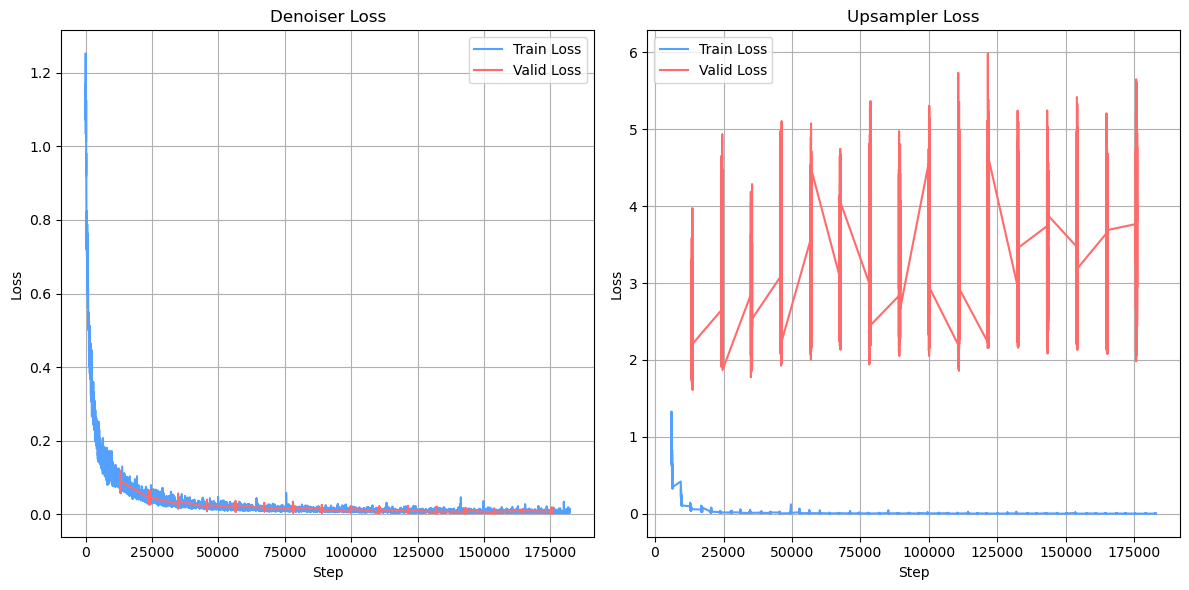

In [37]:

train_color = "#54a0ff"  # Light blue for train loss
valid_color = "#ff6b6b" 

plt.figure(figsize=(12, 6))

#Denoiser
plt.subplot(1, 2, 1)
plt.plot(denoiser_train_loss['Step'], denoiser_train_loss[denoiser_train_loss_key], label='Train Loss', color=train_color)
plt.plot(denoiser_test_loss['Step'], denoiser_test_loss[denoiser_test_loss_key], label='Valid Loss', color=valid_color)
plt.title('Denoiser Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

#Upsampler
plt.subplot(1, 2, 2)
plt.plot(upsampler_train_loss['Step'], upsampler_train_loss[upsampler_train_loss_key], label='Train Loss', color=train_color)
plt.plot(upsampler_test_loss['Step'], upsampler_test_loss[upsampler_test_loss_key], label='Valid Loss', color=valid_color)

plt.title('Upsampler Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



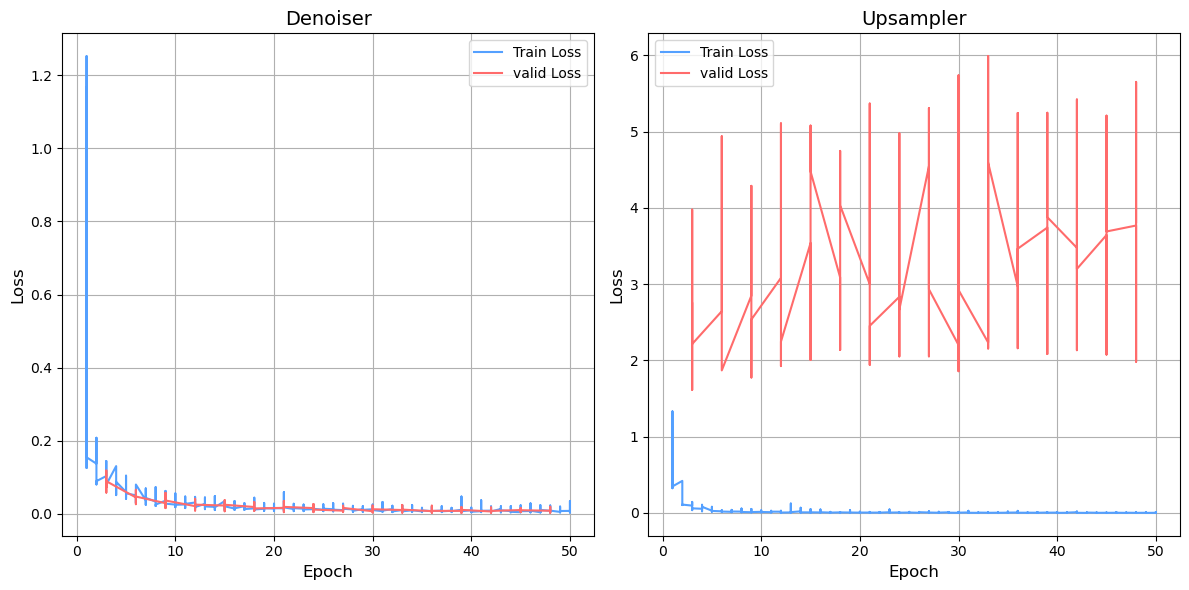

In [38]:

plot_loss_vs_epoch(
    train_loss_files={
        'denoiser': 'human_dataset/denoiser_train_loss.csv',
        'upsampler': 'human_dataset/upsampler_train_loss.csv'
    },
    valid_loss_files={
        'denoiser': 'human_dataset/denoiser_test_loss.csv',
        'upsampler': 'human_dataset/upsampler_test_loss.csv'
    },
    epoch_mapping_file='epoch_steps.csv',
    loss_keys={
        'denoiser': ('experiment-human-data - denoiser/train/loss_denoising', 'experiment-human-data - denoiser/test/loss_denoising'),
        'upsampler': ('experiment-human-data - upsampler/train/loss_denoising', 'experiment-human-data - upsampler/test/loss_denoising')
    },
    titles=['Denoiser', 'Upsampler']
)




# Balanceado

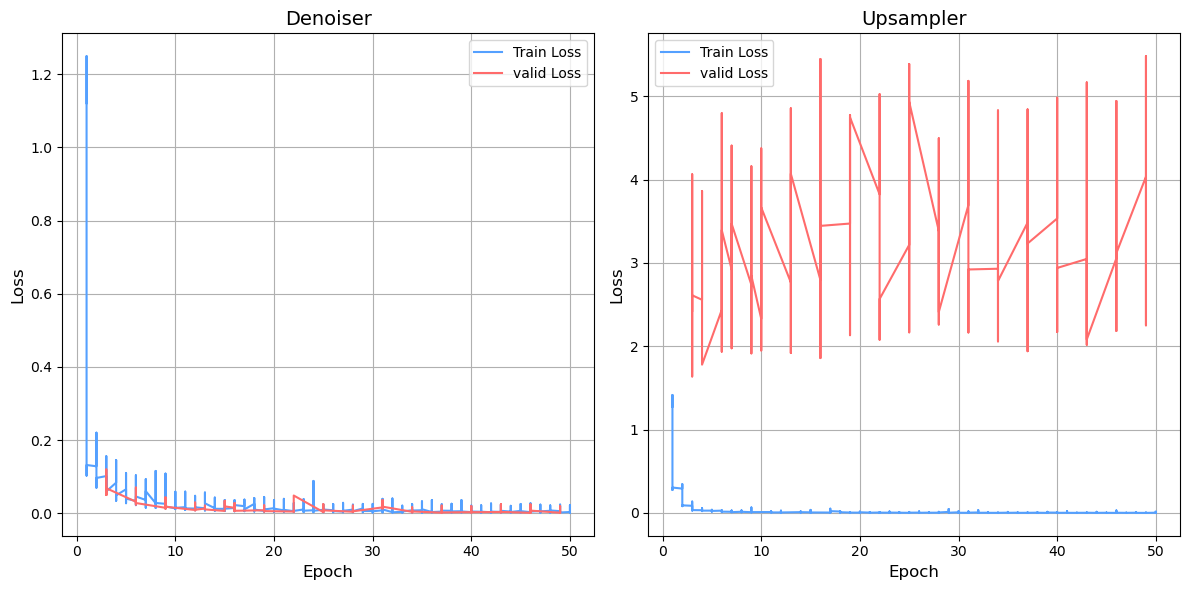

In [39]:

plot_loss_vs_epoch(
    train_loss_files={
        'denoiser': 'balanceado/denoiser_train_loss.csv',
        'upsampler': 'balanceado/upsampler_train_loss.csv'
    },
    valid_loss_files={
        'denoiser': 'balanceado/denoiser_test_loss.csv',
        'upsampler': 'balanceado/upsampler_test_loss.csv'
    },
    epoch_mapping_file='epoch_steps.csv',
    loss_keys={
        'denoiser': ('experiment-balanced-data - denoiser/train/loss_denoising', 'experiment-balanced-data - denoiser/test/loss_denoising'),
        'upsampler': ('experiment-balanced-data - upsampler/train/loss_denoising', 'experiment-balanced-data - upsampler/test/loss_denoising')
    },
    titles=['Denoiser', 'Upsampler']
)


